You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important

In [194]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

Data Dictionary:

Variable Name	Description
Carat-	 Carat weight of the cubic zirconia.
Cut-	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
Color -	 Colour of the cubic zirconia.With D being the best and J the worst.
Clarity	- Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
Depth	- The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
Table- The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
Price- the Price of the cubic zirconia.
X-Length of the cubic zirconia in mm.
Y-Width of the cubic zirconia in mm.
Z-Height of the cubic zirconia in mm.

In [195]:
# reading the CSV file into pandas dataframe
df = pd.read_csv(r"C:\Users\Mathesh R\Downloads\cubic_zirconia.csv") 

In [88]:
df.shape

(26967, 11)

In [196]:

df.drop('Unnamed: 0',inplace=True,axis=1)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [33]:
for column in df[[ 'cut', 'color', 'clarity']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


In [7]:
df.shape

(26967, 10)

1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

a)carat weight of the cubic zirconia

In [8]:
df.carat.describe()

count    26967.000000
mean         0.798375
std          0.477745
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64

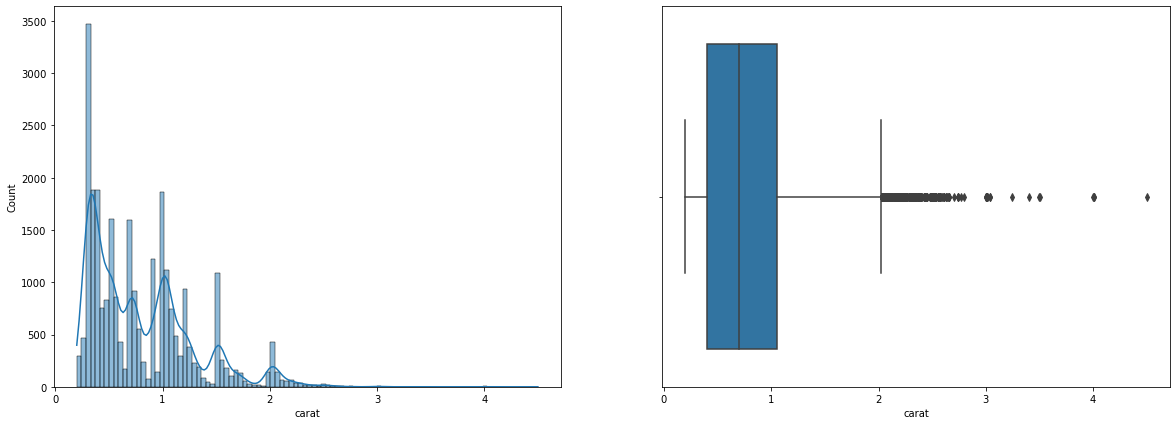

In [9]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(20,7)
sns.histplot(data=df, x='carat', kde=True, ax=axes[0])
sns.boxplot(x='carat', data=df, ax=axes[1])
plt.show()

a) The variable "carat" denotes the weight of the cubic zirconia.
b) Mean weight is 0.79.
c) Median weight is 0.70. Thus the mean weight is greater than the median weight.
d) The variable is right skewed.
e) There are outliers in the dataset.
f) Minimum weight is 0.2
g) Maximum weight is 4.5


b)Cut-Describe the cut quality of the cubic zirconia

In [11]:
print('CUT',df['cut'].nunique())
print(df['cut'].value_counts().sort_values())


CUT 5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


In [16]:
print('CUT',df['cut'].nunique())
print(df['cut'].value_counts(normalize=True).sort_values())

CUT 5
Fair         0.028961
Good         0.090518
Very Good    0.223607
Premium      0.255831
Ideal        0.401083
Name: cut, dtype: float64


C:\Users\Mathesh R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cut', ylabel='count'>

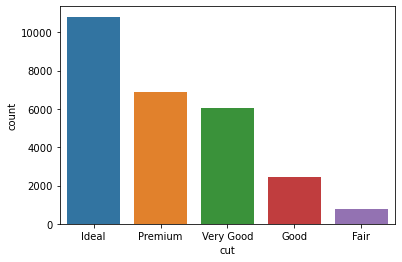

In [6]:
sns.countplot(df.cut)

a)The variable "cut" describes quality of cut of cubic zirconia.
b)There are five qualities of cut. Quality of cut is in increasing order such that Fair, Good, Very Good, Premium, Ideal.
c)The countplot indicates the quantity of zirconia increases as the quality of cut increases. That is, the data set contains cut quality "Ideal" zircona cube the most and cut quality "Fair" the least.



In [ ]:
c)Color - Colour of the cubic zirconia.With D being the best and J the worst.

In [7]:
print('color',df['color'].nunique())
print(df['color'].value_counts().sort_values())


color 7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


C:\Users\Mathesh R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='color', ylabel='count'>

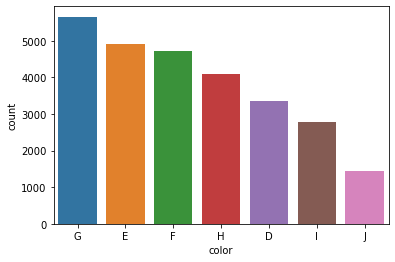

In [8]:
sns.countplot(df.color,order = df['color'].value_counts().index)

a)Color variable indicates the color of the cubic zirconia.
b)There are seven colors in the dataset. They are G, E, F, H, D, I and J.
c)Best to worst order- D, E, F, G, H, I, J.
d)In this dataset, 'G' has highest count and "J" has lowest count.

In [ ]:
d)Clarity	- Clarity refers to the absence of the Inclusions and Blemishes.

In [9]:
print('clarity',df['clarity'].nunique())
print(df['clarity'].value_counts().sort_values())

clarity 8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64


C:\Users\Mathesh R\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity', ylabel='count'>

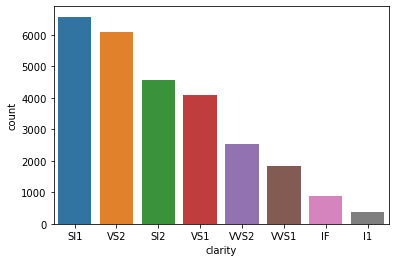

In [10]:
sns.countplot(df.clarity,order = df['clarity'].value_counts().index)

a)Clarity refers to the absence of the Inclusions and Blemishes.Inclusions and blemishes are structural imperfections which affect the clarity grading of diamonds.
b)Arranged in order from Best to Worst in terms of avg price- IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1.
c)Here, Sl1 is highest in number while l1 is least in number.

e)Depth-The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

In [88]:
print(df['depth'].describe())

count    26270.000000
mean        61.745147
std          1.412860
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64


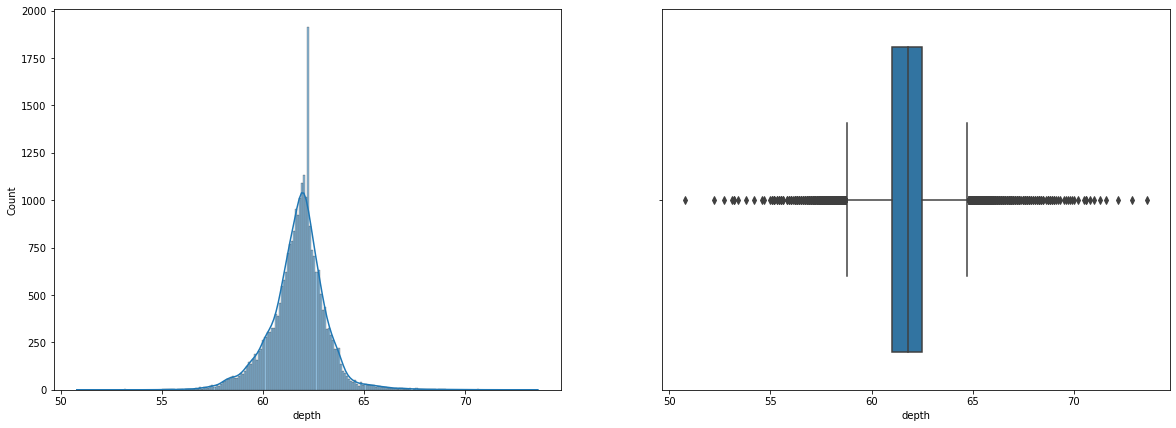

In [87]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(20,7)
sns.histplot(data=df, x='depth', kde=True, ax=axes[0])
sns.boxplot(x='depth', data=df, ax=axes[1])
plt.show()

a)The variable "Depth" indicates the Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
b)The minimum depth is 50.8.
c)The maximum depth is 73.6.
d)Mean and median value is almost equal.
e)It is normally distributed.
f)There are outliers in the variable.

f)Table- The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

In [89]:
print(df['table'].describe())

count    26967.000000
mean        57.456080
std          2.232068
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64


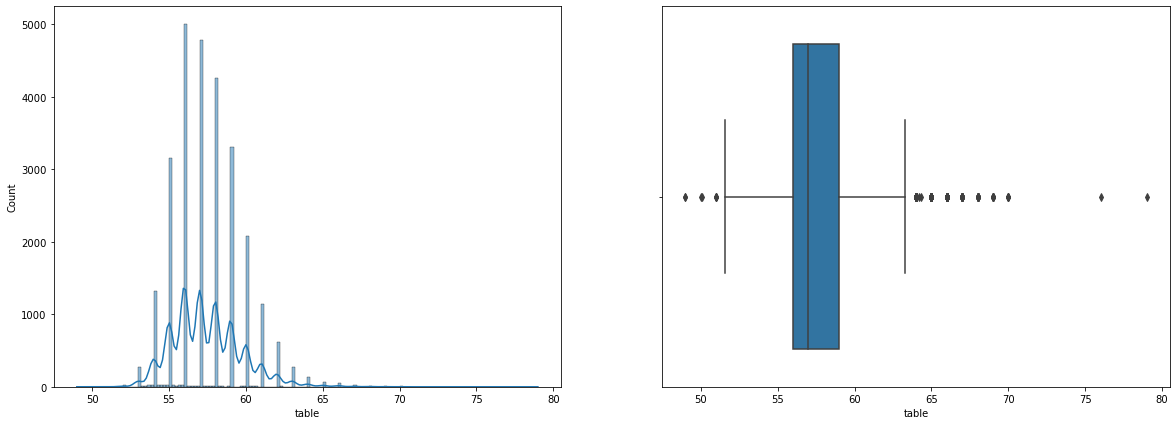

In [11]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(20,7)
sns.histplot(data=df, x='table', kde=True, ax=axes[0])
sns.boxplot(x='table', data=df, ax=axes[1])
plt.show()

a)The variable "Table" denotes the width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
b)Minimum value is 49.
c)Maximum value is 79.
d)Mean and median value is almost equal.
e)There are outliers in the dataset.

g)Price- the Price of the cubic zirconia.

In [94]:
print(df['price'].describe())

count    26967.000000
mean      3939.518115
std       4024.864666
min        326.000000
25%        945.000000
50%       2375.000000
75%       5360.000000
max      18818.000000
Name: price, dtype: float64


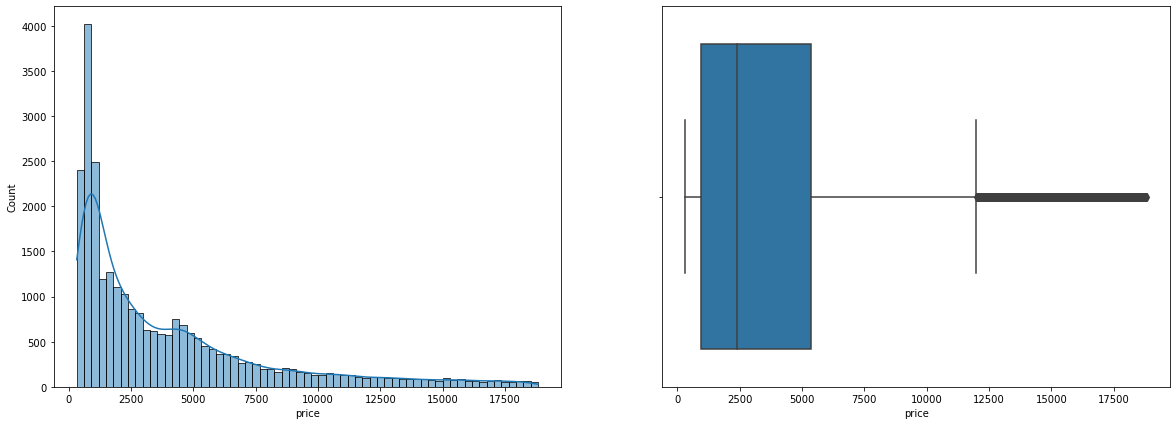

In [95]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(20,7)
sns.histplot(data=df, x='price', kde=True, ax=axes[0])
sns.boxplot(x='price', data=df, ax=axes[1])
plt.show()

In [ ]:
a)This variable denotes the price of the variable.
b)Minimum value is 326.
c)Maximum value is 18818.
d)Mean value is greater than median value.
e)There are outliers in the dataset.
f)It is right skewed.

In [ ]:
h)X-Length of the cubic zirconia in mm.

In [97]:
print(df['x'].describe())

count    26967.000000
mean         5.729854
std          1.128516
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64


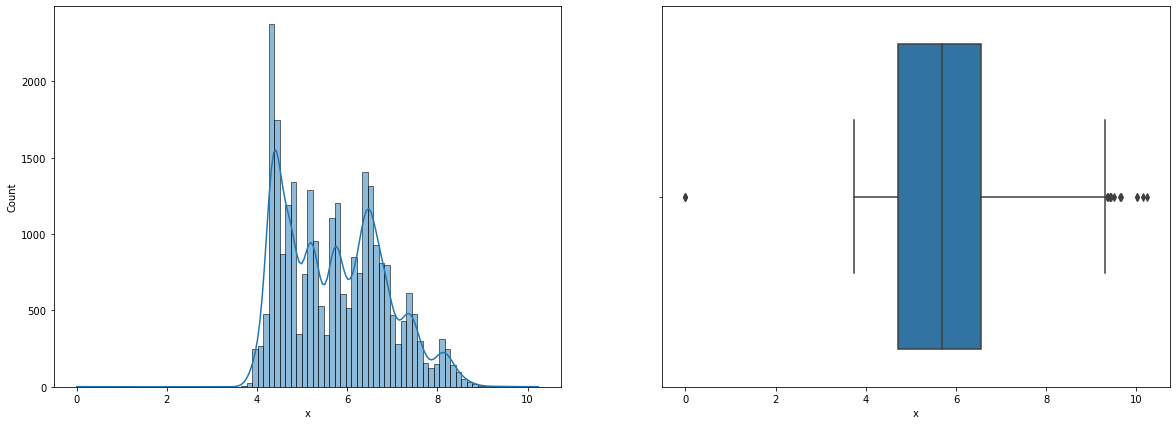

In [96]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(20,7)
sns.histplot(data=df, x='x', kde=True, ax=axes[0])
sns.boxplot(x='x', data=df, ax=axes[1])
plt.show()

In [ ]:
a) X-Length of the cubic zirconia in mm.
b) The maximum length is "0". This indicates noisy data.
c) There are outliers in the dataset.
d) Maximum length is 10.23.
e) Mean and median value is almost equal.

i)y-Width of the cubic zirconia in mm.

In [98]:
print(df['y'].describe())

count    26967.000000
mean         5.733569
std          1.166058
min          0.000000
25%          4.710000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64


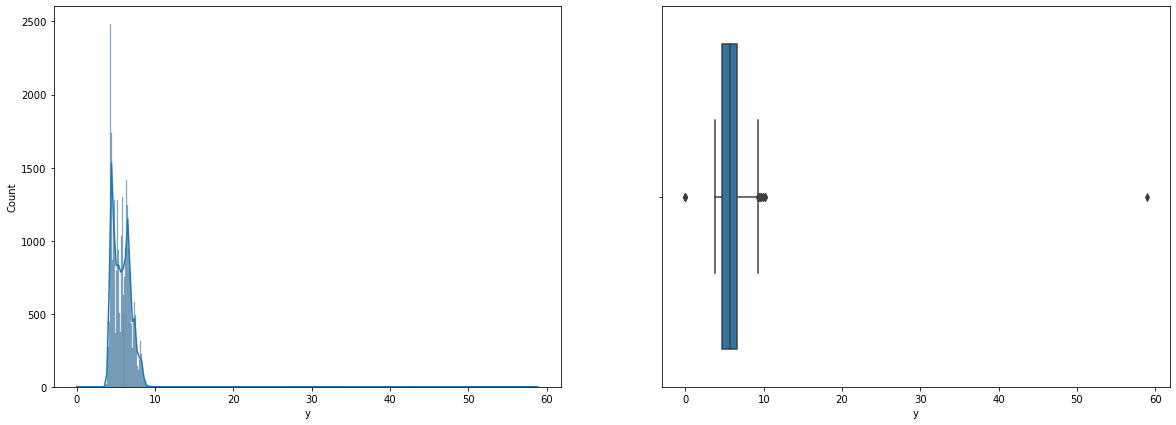

In [99]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(20,7)
sns.histplot(data=df, x='y', kde=True, ax=axes[0])
sns.boxplot(x='y', data=df, ax=axes[1])
plt.show()

a)y-Width of the cubic zirconia in mm.
b)Mean and median value is almost equal.
c)There are outliers in the dataset.
d)Minimum width is "0" which indicates noisy data.
e)maximum value is 58.9


j)z-Height of the cubic zirconia in mm.

In [100]:
print(df['z'].describe())

count    26967.000000
mean         3.538057
std          0.720624
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64


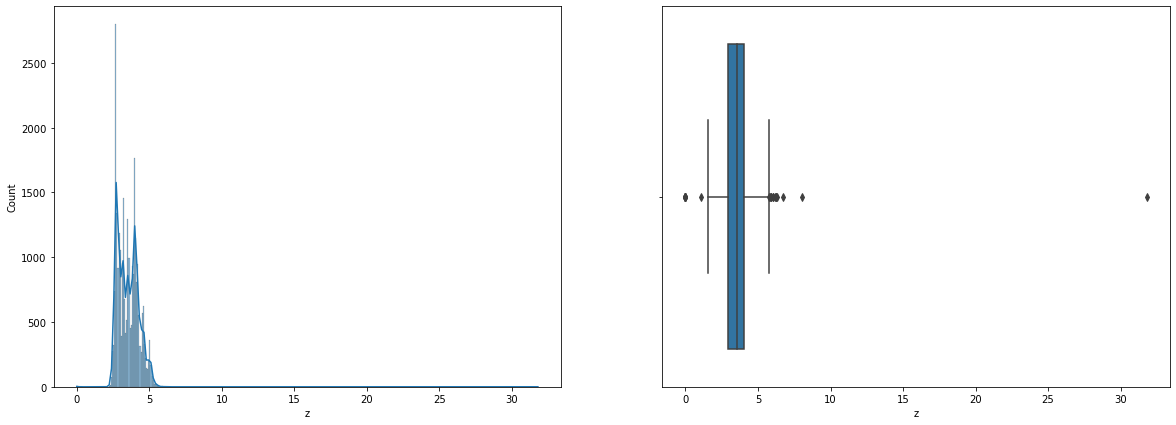

In [101]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(20,7)
sns.histplot(data=df, x='z', kde=True, ax=axes[0])
sns.boxplot(x='z', data=df, ax=axes[1])
plt.show()

a)The variable "z" indicates the height of the cubic zirconia in mm.
b)Maximum height is 31.8.
c)Mean and median value is almost equal.
d)There are outliers in the data set.


In [ ]:
b)Bi variate 

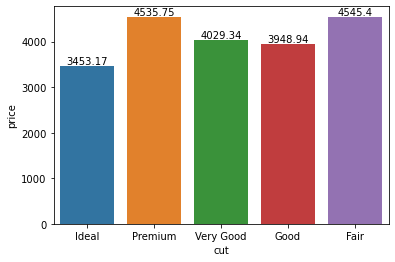

In [55]:
ax=sns.barplot(x="cut", y="price", data=df,ci=None)
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
Premium and 

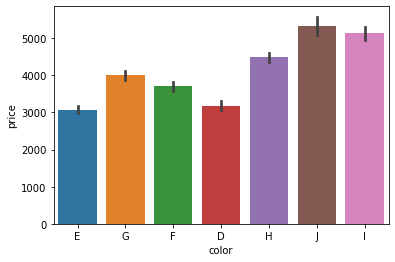

In [107]:
bar2 = sns.barplot(x="color", y="price", data=df)

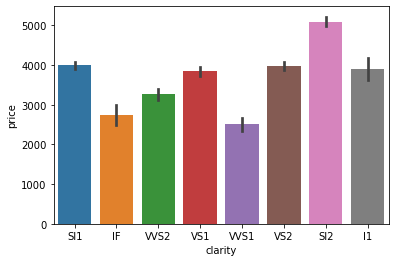

In [108]:
bar3 = sns.barplot(x="clarity", y="price", data=df)

<AxesSubplot:xlabel='cut', ylabel='price'>

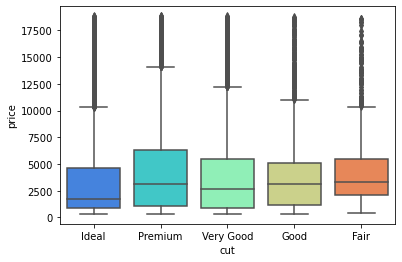

In [110]:
sns.boxplot(x='cut',y='price',data=df,palette='rainbow')

<AxesSubplot:xlabel='cut', ylabel='price'>

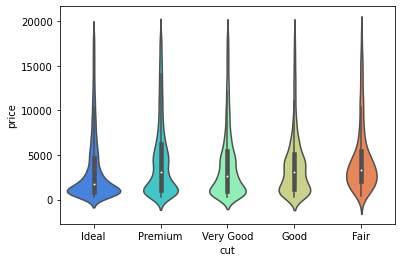

In [111]:
sns.violinplot(x="cut", y="price", data=df,palette='rainbow')


<AxesSubplot:xlabel='color', ylabel='price'>

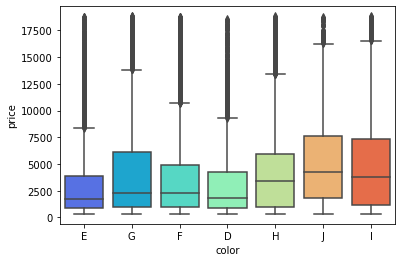

In [16]:
sns.boxplot(x='color',y='price',data=df,palette='rainbow')

<AxesSubplot:xlabel='depth', ylabel='price'>

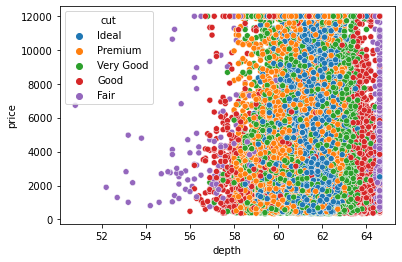

In [69]:
sns.scatterplot(x='depth',data=df,y='price',hue='cut')

<AxesSubplot:xlabel='x', ylabel='price'>

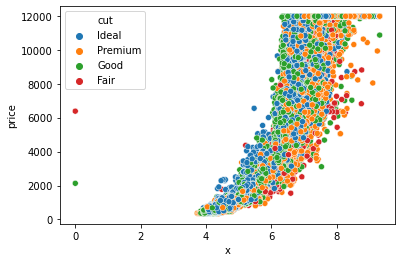

In [159]:
sns.scatterplot(x='x',data=df,y='price',hue='cut')

c)Multivariate

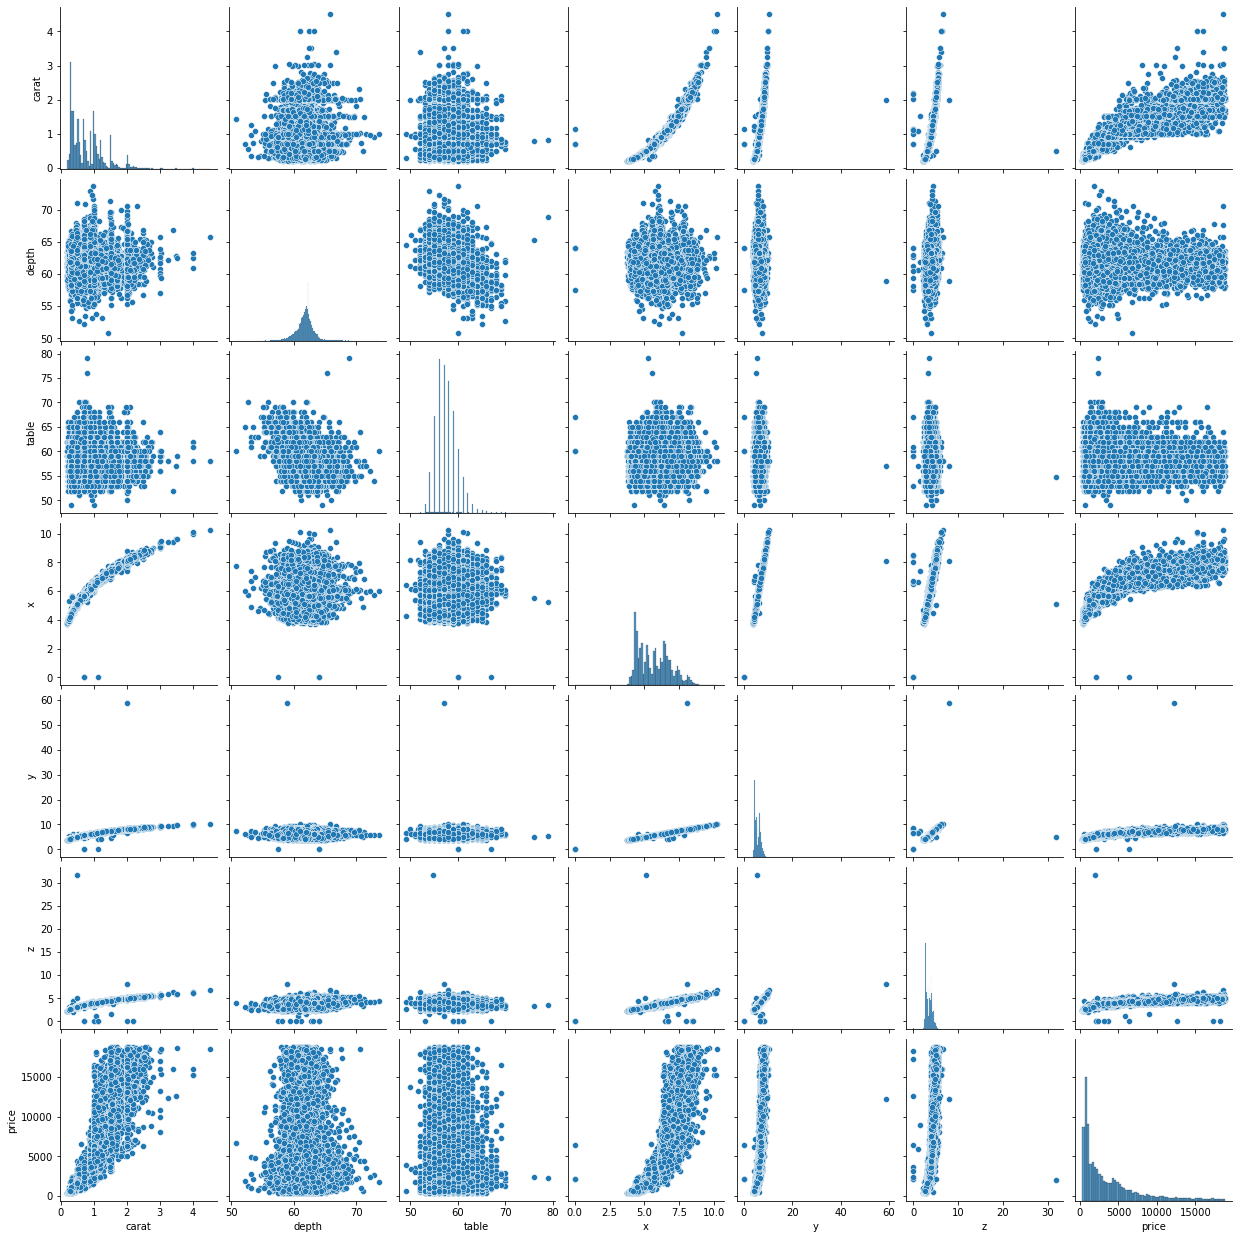

In [64]:
sns.pairplot(df)

In [25]:
corr = df.corr(method='pearson')

C:\Users\Mathesh R\AppData\Local\Temp\ipykernel_25848\3421424599.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


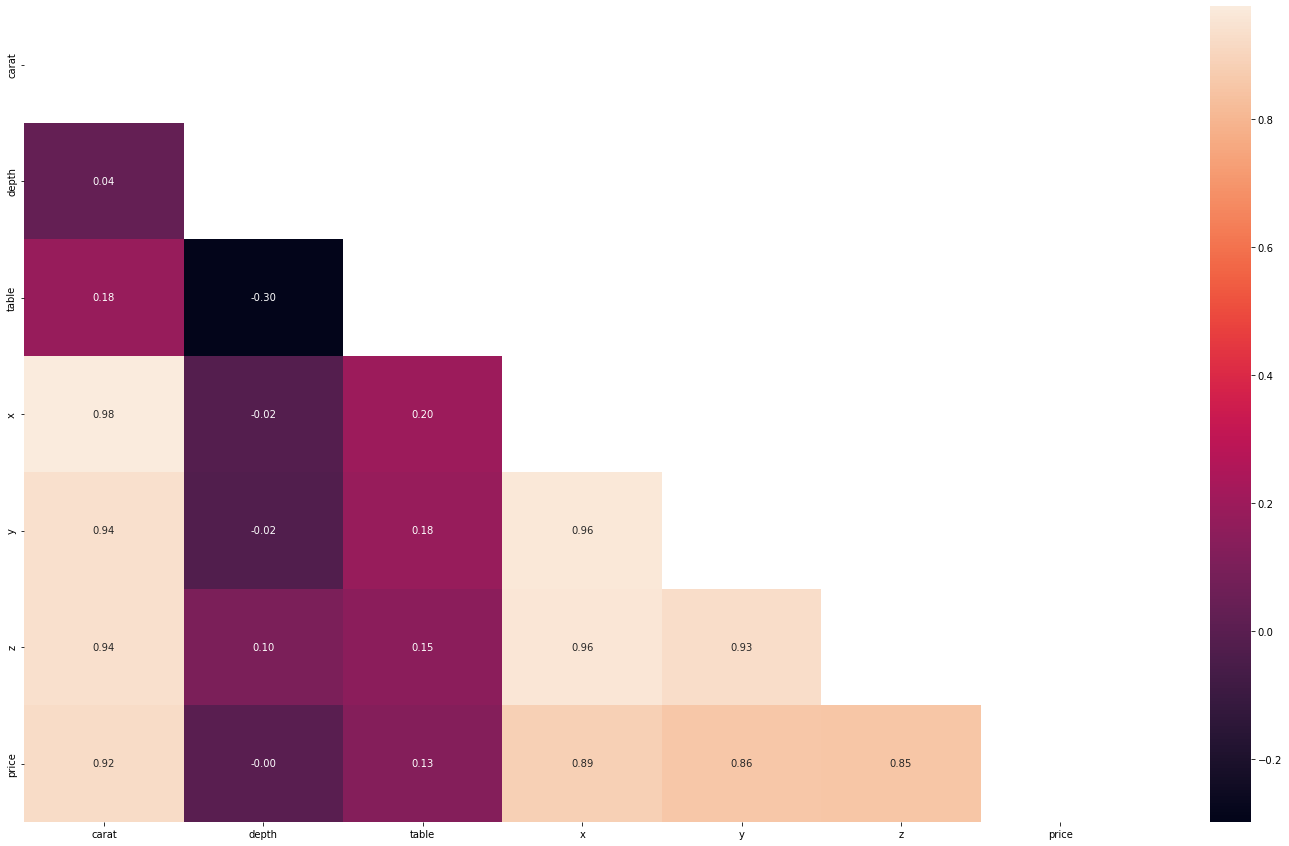

In [26]:
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
fig = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True,fmt='.2f',mask=mask)
plt.show()

Positive correlation:
    1)The variable "Carat" is in positive correlation with the variables "x","y" and "z". It means that the weight of the zircona cube increases when its length, width and height of the cube also increases and vice versa
    2)Carat and price- The price of the cube is directly propotional to its weight.
    3)The variables x,y and z are in positive correlation with each other. For instance, if the length of the cube increases then the width and height of the cube also increases
    4)The price of the cube depends on its length(x), width(y) and height(z).
 
Negative correlation:
    1) The variables table and depth is slightly in negative correlation with each other.
 

Data preprocessing:
a)Null values

In [62]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [63]:
df[df.isna().any(axis=1)]


,carat,cut,color,clarity,depth,table,x,y,z,price
26,0.34,Ideal,D,SI1,NaN,57.0,4.50,4.44,2.74,803
86,0.74,Ideal,E,SI2,NaN,59.0,5.92,5.97,3.52,2501
117,1.00,Premium,F,SI1,NaN,59.0,6.40,6.36,4.00,5292
148,1.11,Premium,E,SI2,NaN,61.0,6.66,6.61,4.09,4177
163,1.00,Very Good,F,VS2,NaN,55.0,6.39,6.44,3.99,6340
...,...,...,...,...,...,...,...,...,...,...
26848,1.22,Very Good,H,VS1,NaN,59.0,6.91,6.85,4.29,7673
26854,1.29,Premium,I,VS2,NaN,58.0,7.12,7.03,4.27,6321
26879,0.51,Very Good,E,SI1,NaN,58.0,5.10,5.13,3.12,1343
26923,0.51,Ideal,D,VS2,NaN,57.0,5.12,5.09,3.18,1882


The dataset has 697 null values. All are present in 'depth' variable. Since we have outliers in the dataset, we can impute it with median value.


In [197]:
df['depth'].replace(np.NaN , df['depth'].median(),inplace=True)


In [121]:
df.isnull().sum()


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

b)Duplicates


In [173]:
df.duplicated().sum()


34

In [174]:
df[df.duplicated()]


,carat,cut,color,clarity,depth,table,x,y,z,price
4756,0.35,Premium,J,VS1,62.4,58.0,5.67,5.64,3.53,949
6215,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.00,2130
8144,0.33,Ideal,G,VS1,62.1,55.0,4.46,4.43,2.76,854
8919,1.52,Good,E,I1,57.3,58.0,7.53,7.42,4.28,3105
9818,0.35,Ideal,F,VS2,61.4,54.0,4.58,4.54,2.80,906
10473,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898
10500,1.00,Premium,F,VVS2,60.6,54.0,6.56,6.52,3.96,8924
12894,1.21,Premium,D,SI2,62.5,57.0,6.79,6.71,4.22,6505
13547,0.43,Ideal,G,VS1,61.9,55.0,4.84,4.86,3.00,943
13783,0.79,Ideal,G,SI1,62.3,57.0,5.90,5.85,3.66,2898


In [198]:
df.drop_duplicates(inplace=True)


In [14]:
df.duplicated().sum()


0

In [35]:
There are 34 duplicates in the dataset which can be dropped.

SyntaxError: invalid syntax (3541644675.py, line 1)

Checking rows with 0 as value


In [199]:
for i in df.columns:
    if (df[i].dtype == 'float') or (df[i].dtype == 'int') or (df[i].dtype == 'object'): 
        zero=df.loc[df[i]==0]

In [125]:
zero.reset_index()

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,5821,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
1,6034,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
2,10827,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
3,12498,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
4,12689,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
5,17506,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
6,18194,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
7,23758,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


There are eight observations in the dataset with value 0 in atleast one of the variables. This denotes noisy data so can be dropped.

In [39]:
df.shape

(26236, 10)

In [200]:
df.drop(df[(df['x'] ==0) | (df['y']==0) | (df['z']==0) ].index, inplace=True)


In [52]:
df.shape

(26228, 10)

In [201]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

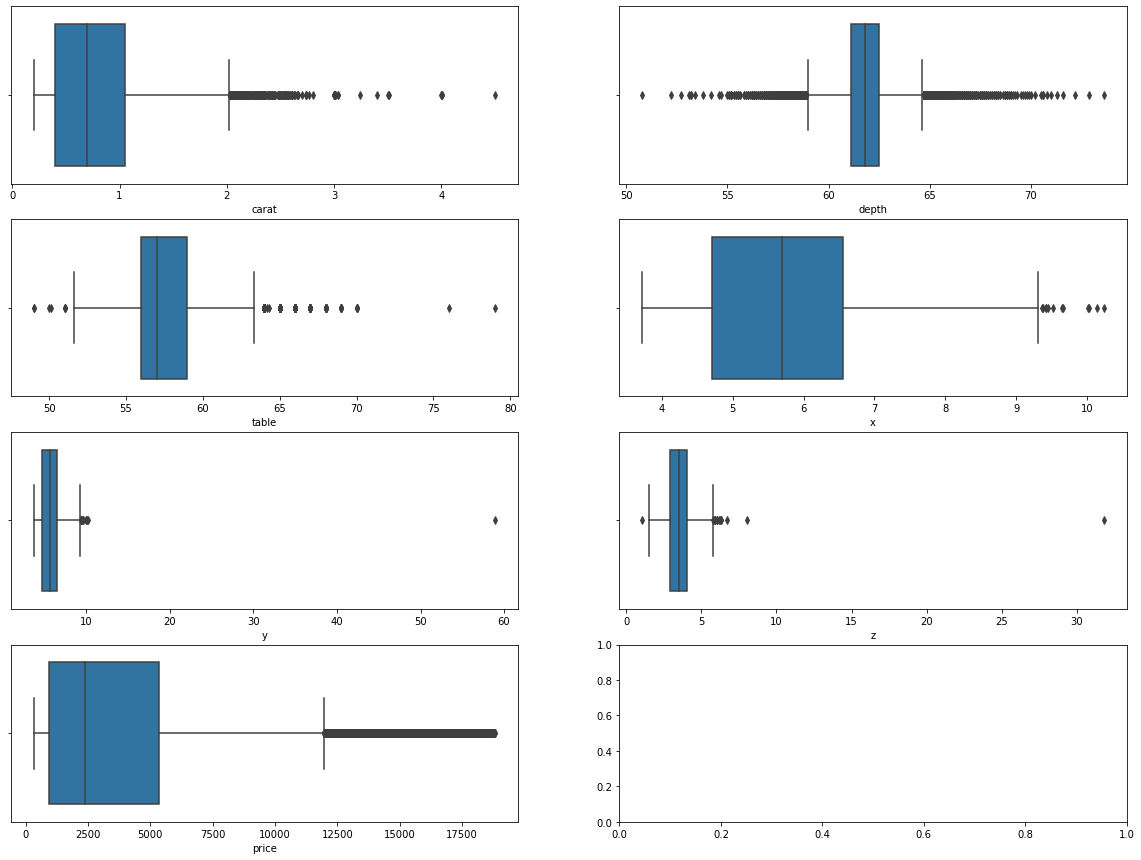

In [202]:
fig, axes = plt.subplots(4,2)
fig.set_size_inches(20,15)
sns.boxplot(x='carat', data=df, ax=axes[0][0])
sns.boxplot(x='depth', data=df, ax=axes[0][1])
sns.boxplot(x='table', data=df, ax=axes[1][0])
sns.boxplot(x='x', data=df, ax=axes[1][1])
sns.boxplot(x='y', data=df, ax=axes[2][0])
sns.boxplot(x='z', data=df, ax=axes[2][1])
sns.boxplot(x='price', data=df, ax=axes[3][0])
plt.show()

In [203]:
cols = ['carat','depth','table','x','y','z','price']
for column in cols:
 #if df[column].dtype != 'object': 
         lr,ur=remove_outlier(df[column])
         df[column]=np.where(df[column]>ur,ur,df[column])
         df[column]=np.where(df[column]<lr,lr,df[column])

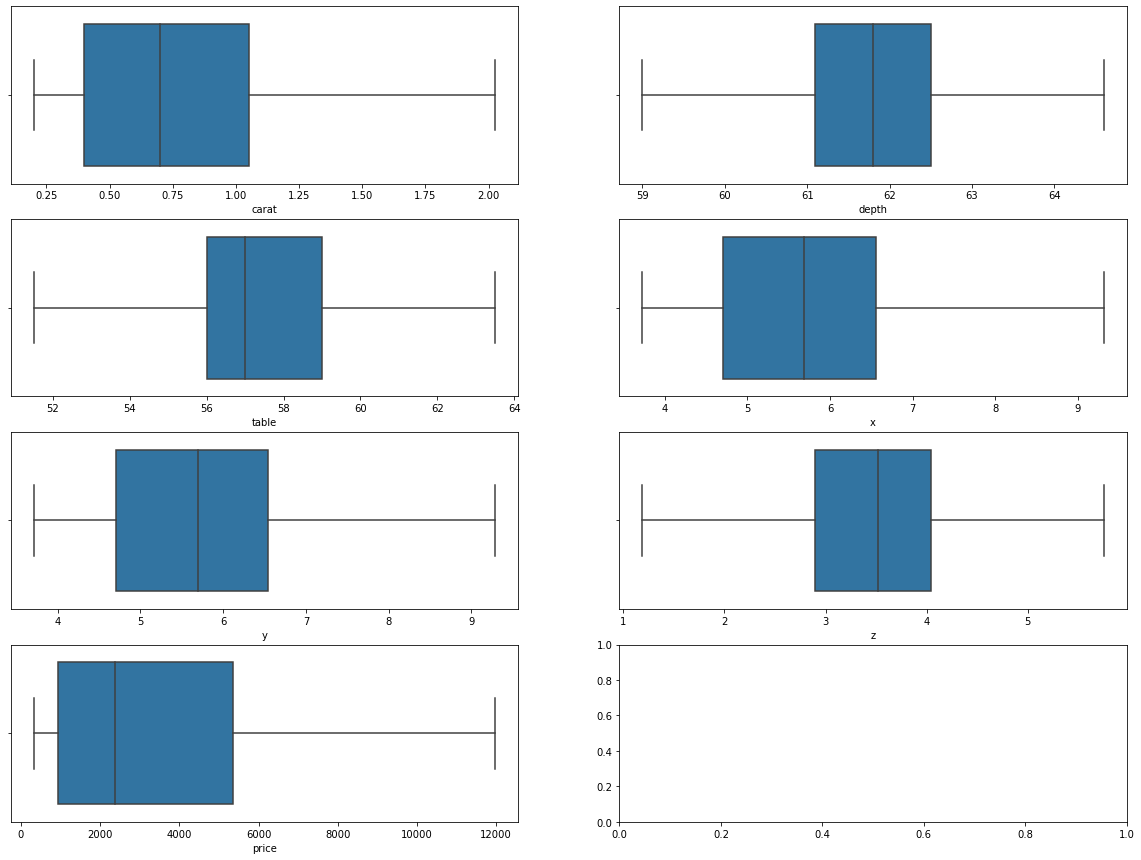

In [204]:
fig, axes = plt.subplots(4,2)
fig.set_size_inches(20,15)
sns.boxplot(x='carat', data=df, ax=axes[0][0])
sns.boxplot(x='depth', data=df, ax=axes[0][1])
sns.boxplot(x='table', data=df, ax=axes[1][0])
sns.boxplot(x='x', data=df, ax=axes[1][1])
sns.boxplot(x='y', data=df, ax=axes[2][0])
sns.boxplot(x='z', data=df, ax=axes[2][1])
sns.boxplot(x='price', data=df, ax=axes[3][0])
plt.show()

In [205]:
from sklearn.preprocessing import StandardScaler

In [206]:
X= StandardScaler()

In [207]:
m=df.select_dtypes(include=['floating'])

In [208]:
df[m.columns] = X.fit_transform(m)

In [209]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.067382,Ideal,E,SI1,0.286766,0.261968,-1.296530,-1.289659,-1.261558,-0.933395
1,-1.002446,Premium,G,IF,-0.780365,0.261968,-1.163253,-1.137530,-1.204060,-0.793477
2,0.231349,Very Good,E,VVS2,0.368853,1.189326,0.276134,0.347964,0.348406,0.736960
3,-0.807636,Ideal,F,VS1,-0.123669,-0.665390,-0.807849,-0.833272,-0.830318,-0.765205
4,-1.045737,Ideal,F,VVS1,-1.108713,0.725647,-1.225449,-1.164377,-1.275933,-0.852618


In [ ]:
Cut-	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

In [95]:
df[['price', 'cut']].groupby(['cut']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='summer')

In [101]:
df.groupby('cut').median()


,carat,depth,table,x,y,z,price
cut,,,,,,,
Fair,1.00,64.6,58.0,6.19,6.12,3.99,3337.0
Good,0.84,63.3,58.0,6.01,6.02,3.70,3092.5
Ideal,0.54,61.8,56.0,5.23,5.25,3.23,1762.0
Premium,0.83,61.5,59.0,6.08,6.03,3.70,3108.0
Very Good,0.72,62.1,58.0,5.74,5.77,3.56,2633.0


In [102]:
df['cut'].value_counts(normalize=True)

Ideal        0.401300
Premium      0.255525
Very Good    0.223844
Good         0.090399
Fair         0.028932
Name: cut, dtype: float64

In [210]:
df['cut'] = np.where(df.cut == 'Fair','Good', df.cut)

#df['cut'] = np.where(df.cut == 'Very Good','Good', df.cut)

In [211]:
df['cut'] = np.where(df.cut == 'Good',1, df.cut)
df['cut'] = np.where(df.cut == 'Very Good',2, df.cut)
df['cut'] = np.where(df.cut == 'Premium',3, df.cut)
df['cut'] = np.where(df.cut == 'Ideal',4, df.cut)

In [20]:
df['cut'].value_counts(normalize=True)

4    0.401300
3    0.255525
2    0.223844
1    0.119331
Name: cut, dtype: float64

In [ ]:
"Fair" level is just 2 percent of the dataset.So, we can merge it with next nearest level that is "good".

In [ ]:
Color -	 Colour of the cubic zirconia.With D being the best and J the worst.

In [103]:
df['color'].value_counts(normalize=True)

G    0.209842
E    0.182581
F    0.175376
H    0.151941
D    0.124085
I    0.102693
J    0.053482
Name: color, dtype: float64

b)Color -	 Colour of the cubic zirconia.With D being the best and J the worst.

In [99]:
df[['price', 'color']].groupby(['color']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='viridis')

In [212]:
df['color'] = np.where(df.color == 'D','VERY GOOD', df.color)
df['color'] = np.where(df.color == 'E','VERY GOOD', df.color)
df['color'] = np.where(df.color == 'F','GOOD', df.color)
df['color'] = np.where(df.color == 'G','GOOD', df.color)
df['color'] = np.where(df.color == 'H','GOOD', df.color)
df['color'] = np.where(df.color == 'I','Fair', df.color)
df['color'] = np.where(df.color == 'J','Fair', df.color)
df['color'].value_counts()

GOOD         14463
VERY GOOD     8257
Fair          4205
Name: color, dtype: int64

In [22]:
df['color'].value_counts()

2    14463
3     8257
1     4205
Name: color, dtype: int64

In [213]:
df['color'] = np.where(df.color == 'GOOD',2, df.color)
df['color'] = np.where(df.color == 'VERY GOOD',3, df.color)
df['color'] = np.where(df.color == 'Fair',1, df.color)

Mean price of different colors ranges from 3067 to 5008. Worser the color, greater the mean price. Here we merge "D" and "E" into as 'Very Good' and "F", "G", "H" as GOOD and "I", "j" as Very good.

Clarity	- Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

In [43]:
df['clarity'].value_counts(normalize=True)

SI1     0.243788
VS2     0.226258
SI2     0.169396
VS1     0.151755
VVS2    0.093965
VVS1    0.068301
IF      0.033092
I1      0.013445
Name: clarity, dtype: float64

In [44]:
df[['price', 'clarity']].groupby(['clarity']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='magma')

"IF" level is just 1 percent of the dataset and "VVS1" level is also quite small, it is merged with nearest level "VVS2". "VVS2" is renamed as"Average" clarity.Then, VS1 is merged with "VS2" and renamed as "Good".Then, SI1 AND I1 is merged into "SI2" and renamed as "VeryGood"

In [214]:
df['clarity'] = np.where(df.clarity == 'IF','Average', df.clarity)
df['clarity'] = np.where(df.clarity == 'VVS1','Average', df.clarity)
df['clarity'] = np.where(df.clarity == 'VVS2','Average', df.clarity)
df['clarity'] = np.where(df.clarity == 'VS1','Good', df.clarity)
df['clarity'] = np.where(df.clarity == 'VS2','Good', df.clarity)
df['clarity'] = np.where(df.clarity == 'SI1','VeryGood', df.clarity)
df['clarity'] = np.where(df.clarity == 'I1','VeryGood', df.clarity)
df['clarity'] = np.where(df.clarity == 'SI2','VeryGood', df.clarity)
df['clarity'].value_counts()

VeryGood    11487
Good        10178
Average      5260
Name: clarity, dtype: int64

In [215]:
df['clarity'] = np.where(df.clarity == 'Average',1, df.clarity)
df['clarity'] = np.where(df.clarity == 'Good',2, df.clarity)
df['clarity'] = np.where(df.clarity == 'VeryGood',3, df.clarity)

In [110]:
df['clarity'].value_counts()

3    11487
2    10178
1     5260
Name: clarity, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.3+ MB


Converting all objects to categorical codes

In [216]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        df[feature] = pd.Categorical(df[feature]).codes


C:\Users\Mathesh R\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [217]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.067382,3,2,2,0.286766,0.261968,-1.296530,-1.289659,-1.261558,-0.933395
1,-1.002446,2,1,0,-0.780365,0.261968,-1.163253,-1.137530,-1.204060,-0.793477
2,0.231349,1,2,0,0.368853,1.189326,0.276134,0.347964,0.348406,0.736960
3,-0.807636,3,1,1,-0.123669,-0.665390,-0.807849,-0.833272,-0.830318,-0.765205
4,-1.045737,3,1,0,-1.108713,0.725647,-1.225449,-1.164377,-1.275933,-0.852618


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  int8   
 2   color    26925 non-null  int8   
 3   clarity  26925 non-null  int8   
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  float64
dtypes: float64(7), int8(3)
memory usage: 1.7 MB


In [ ]:
For model building, it is necessary to convert the object datatype into numerical or categorical datatypes for the Algorithm to understand better.
Our dataset contains three object datatypes which need to be converted
Since the categorical variables are given in ordinal format, we can not use one hot encoding. Thus, by using ordinal encoding we convert the categorical variables. 

In [218]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [166]:
•Dataset is split into independent variables and dependent variable (Target variable).
•Independent variable-Includes all variables except ‘price’ variable
•Dependent variable-It includes only the target variable ‘price’.

SyntaxError: invalid character '•' (U+2022) (404263559.py, line 1)

In [167]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.067382,3,2,2,0.286766,0.261968,-1.296530,-1.289659,-1.261558
1,-1.002446,2,1,0,-0.780365,0.261968,-1.163253,-1.137530,-1.204060
2,0.231349,1,2,0,0.368853,1.189326,0.276134,0.347964,0.348406
3,-0.807636,3,1,1,-0.123669,-0.665390,-0.807849,-0.833272,-0.830318
4,-1.045737,3,1,0,-1.108713,0.725647,-1.225449,-1.164377,-1.275933


In [219]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.3+ MB



•Then, it is split into training data and testing data.
•Training set-To train the model.
•Testing set-To evaluate whether the model can generalise well to new, unseen data. For instance, if the training accuracy is extremely high while the testing accuracy is poor then this is a good indicator that the model is probably overfitted.
Here, 30 percent of the dataset is taken as testing set.


Linear regression by sklearn and ols

In [220]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [221]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.163583054356732
The coefficient for cut is 0.03179057959474473
The coefficient for color is 0.170785586399062
The coefficient for clarity is -0.2471395606035423
The coefficient for depth is 0.010837572065543989
The coefficient for table is -0.014373288616890939
The coefficient for x is -0.5505194723313589
The coefficient for y is 0.6504141483749075
The coefficient for z is -0.22874573418602703


In [222]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 0.04612648907664712


In [223]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.27809400928316647

In [224]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.28025632021693825

In [225]:
# R square on training data
regression_model.score(X_train, y_train)

0.922301644812208

In [226]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9222997736776652

Linear Regression using statsmodels(OLS)¶


In [227]:
import statsmodels.api as sm

In [228]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [229]:
model = sm.OLS(y_train,X_train).fit()
model

In [230]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 2.484e+04
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:17:55   Log-Likelihood:                -2622.4
No. Observations:               18847   AIC:                             5265.
Df Residuals:                   18837   BIC:                             5343.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0461      0.007      6.380      0.000       0.032       0.060
carat          1.1636      0.012     99.572      0.000       1.141       1.186
cut            0.0318      0.002     13.360      0.000       0.027       0.036
color          0.1708      0.003     53.284      0.000       0.165       0.177
clarity       -0.2471      0.003    -83.750      0.000      -0.253      -0.241
depth          0.0108      0.004      2.610      0.009       0.003       0.019
table         -0.0144      0.003     -5.529      0.000      -0.019      -0.009
x             -0.5505      0.047    -11.760      0.000      -0.642      -0.459
y              0.6504      0.046     14.210      0.000       0.561       0.740
z             -0.2287      0.030     -7.711      0.000      -0.287      -0.171
==============================================================================
Omnibus:                     2876.662   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14269.164
Skew:                           0.654   Prob(JB):                         0.00
Kurtosis:                       7.057   Cond. No.                         87.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [231]:
92.2 percent of the target variable "price" is explained by this regression model.

SyntaxError: invalid syntax (15554401.py, line 1)

In [232]:
#Calculate MSE on train
predicted_train=model.predict(X_train)
mse=metrics.mean_squared_error(y_train,predicted_train)


In [233]:
np.sqrt(mse) #RMSE on train 

0.27809400928316647

In [234]:
# Prediction on Test data
y_pred = model.predict(X_test)

In [235]:
#Calculate MSE on test
mse=metrics.mean_squared_error(y_test,y_pred)
np.sqrt(mse) #RMSE on test


0.28025632021693825

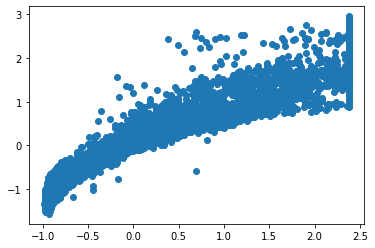

In [236]:
plt.scatter(y_test, y_pred)
plt.show()

In [237]:
for i,j in np.array(model.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.05) * const + (1.16) * carat + (0.03) * cut + (0.17) * color + (-0.25) * clarity + (0.01) * depth + (-0.01) * table + (-0.55) * x + (0.65) * y + (-0.23) * z + 

How to check for Multicollinearity
There are different ways of detecting (or testing) multicollinearity. One such way is Variation Inflation Factor.

Variance Inflation factor: Variance inflation factors measure the inflation in the variances of the regression coefficients estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient  𝛽𝑘  is "inflated" by the existence of correlation among the predictor variables in the model.

General Rule of Thumb:

If VIF is 1, then there is no correlation among the  𝑘 th predictor and the remaining predictor variables, and hence, the variance of  𝛽𝑘  is not inflated at all.
If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.
The purpose of the analysis should dictate which threshold to use.

In [238]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const       12.732906
carat       32.958161
cut          1.519167
color        1.100127
clarity      1.207947
depth        4.205733
table        1.645868
x          529.664496
y          506.699571
z          212.606739
dtype: float64



* The VIF values indicate that the features carat, x, y, and z are correlated with one or more independent features.

* Multicollinearity affects only the specific independent variables that are correlated. Therefore, in this case, we can trust the p-values of depth, cut,color,clarity and table variables.

* To treat multicollinearity, we will have to drop one or more of the correlated features (carat, x, y, and z).

* We will drop the variable that has the least impact on the adjusted R-squared of the model.

In [ ]:
#### Let's remove/drop multicollinear columns one by one and observe the effect on our predictive model.

In [188]:
X_train2 = X_train.drop(["carat"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.881 
Adjusted R-squared: 0.881


In [ ]:
* On dropping 'carat', adj. R-squared decresed by almost 4 percent.
This sharp decline indicates that 'weight' is an important predictor and shouldn't be removed.

In [189]:
X_train3 = X_train.drop(["x"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train3)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.922 
Adjusted R-squared: 0.922


In [ ]:
* On dropping 'x', adj. R-squared decresed by just 0.1 percent.

In [ ]:
**Since there is no effect on adj. R-squared after dropping the 'x' column, we can remove it from the training set.**

In [190]:
X_train = X_train.drop(["x"], axis=1)

In [191]:
olsmod_5 = sm.OLS(y_train, X_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 2.773e+04
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:14:36   Log-Likelihood:                -2691.4
No. Observations:               18847   AIC:                             5401.
Df Residuals:                   18838   BIC:                             5471.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0585      0.007      8.142      0.0

In [192]:
X_train6 = X_train.drop(["y"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train6)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.921 
Adjusted R-squared: 0.921


In [ ]:
* On dropping 'y', adj. R-squared decresed by just 0.1 percent.

In [193]:
X_train5 = X_train.drop(["z"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train5)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.921 
Adjusted R-squared: 0.921


In [ ]:
* On dropping 'z', adj. R-squared decresed by just 0.1 percent.

In [ ]:
**Since there is no effect on adj. R-squared after dropping the 'x' column, we can remove it from the training set.**

In [239]:
X_train = X_train.drop(["x"], axis=1)

In [240]:
olsmod_5 = sm.OLS(y_train, X_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 2.773e+04
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:19:10   Log-Likelihood:                -2691.4
No. Observations:               18847   AIC:                             5401.
Df Residuals:                   18838   BIC:                             5471.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0585      0.007      8.142      0.0

In [ ]:
### Let's check if multicollinearity is still present in the data.

In [241]:
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const       12.465252
carat       32.307512
cut          1.490519
color        1.100120
clarity      1.192524
depth        4.016063
table        1.593468
y          199.829627
z          191.041341
dtype: float64



In [242]:
X_train6 = X_train.drop(["y"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train6)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.921 
Adjusted R-squared: 0.921


**Since there is no effect on adj. R-squared after dropping the 'y' column, we can remove it from the training set.**

In [243]:
X_train = X_train.drop(["y"], axis=1)

In [244]:
olsmod_5 = sm.OLS(y_train, X_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 3.158e+04
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:20:11   Log-Likelihood:                -2723.5
No. Observations:               18847   AIC:                             5463.
Df Residuals:                   18839   BIC:                             5526.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0607      0.007      8.443      0.0

In [ ]:
**Since there is no effect on adj. R-squared after dropping the 'z' column, we can remove it from the training set.**

In [245]:
vif_series5 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series5))

VIF values: 

const      12.446691
carat      30.072614
cut         1.483291
color       1.100119
clarity     1.192064
depth       1.414269
table       1.587985
z          30.484370
dtype: float64



In [246]:
X_train7 = X_train.drop(["z"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train7)
olsres_6 = olsmod_6.fit()
print(
    "R-squared:",
    np.round(olsres_6.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_6.rsquared_adj, 3),
)

R-squared: 0.921 
Adjusted R-squared: 0.921


In [247]:
X_train = X_train.drop(["z"], axis=1)

In [248]:
olsmod_6 = sm.OLS(y_train, X_train)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                 3.655e+04
Date:                Sun, 16 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:20:41   Log-Likelihood:                -2791.9
No. Observations:               18847   AIC:                             5598.
Df Residuals:                   18840   BIC:                             5653.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0672      0.007      9.346      0.0

In [249]:
vif_series7 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series7))

Series before feature selection: 

const      12.371762
carat       1.256756
cut         1.482720
color       1.099167
clarity     1.164470
depth       1.298277
table       1.584899
dtype: float64



In [ ]:
### Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables.

In [ ]:
After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply. This shows that these variables did not have much predictive power.**

In [250]:
X_train.columns

Index(['const', 'carat', 'cut', 'color', 'clarity', 'depth', 'table'], dtype='object')

In [251]:
X_test.columns

Index(['const', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z'],
      dtype='object')

In [252]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    ["x", "y", "z"], axis=1
)

In [253]:
# let's make predictions on the test set
y_pred = olsres_6.predict(X_test2)

In [254]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, df_pred["Fitted Values"]))
rmse1

NameError: name 'mean_squared_error' is not defined

In [255]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [256]:
# let's check the RMSE on the test data
#predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
#np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
rmse2

0.2828049645764942

In [257]:
for i,j in np.array(olsres_6.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.07) * const + (1.04) * carat + (0.03) * cut + (0.17) * color + (-0.26) * clarity + (-0.01) * depth + (-0.02) * table + 